# Predicting Yelp Stars from Reviews

In [7]:
import os
import getpass
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt
import json
import glob
import sys
from collections import Counter
from datetime import datetime as datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
%matplotlib inline

In [8]:
data_path = 'C:\DataSets\yelp_dataset\dataset_restaurants'
# data_name = 'yelp_academic_dataset_review_restaurants.json'
data_name = 'yelp_academic_dataset_review_restaurants_small_100000.json'
filename = os.path.join( data_path, data_name )

In [9]:
# read the data from disk and split into lines
# we use .strip() to remove the final (empty) line
# with open(filename) as f:
#     reviews = f.read().strip().split("\n")
    
# each line of the file is a separate JSON object
# reviews = [json.loads(review) for review in reviews] 
 
# # we're interested in the text of each review 
# # and the stars rating, so we load these into 
# # separate lists
# texts = [review['text'] for review in reviews]
# stars = [review['stars'] for review in reviews]

In [10]:
data_review = pd.read_json(filename, lines=True )

In [14]:
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,4P-vTvE6cncJyUyLh73pxw,0,2014-03-29,0,6-hKBi-6RC3g7Mft0c-6qw,4,This place is a area staple! Been around for y...,review,0,PmgqNO0-5Y3e3UoR61TD7w
1,4P-vTvE6cncJyUyLh73pxw,0,2014-08-14,0,tRd0-mPa9O1TMJp_dw5khQ,4,Got my mojo back after having a few of their a...,review,0,kXUySHSlRgVrcR4Aa0HtGQ
2,4P-vTvE6cncJyUyLh73pxw,0,2012-10-20,0,8Mu56iQ-MYEyivqUVss0XA,4,"Don't go here for the decor, but the staff is ...",review,1,SYKPwRhnlKrW6yTvm7oPWg
3,4P-vTvE6cncJyUyLh73pxw,1,2012-08-25,0,ToC77cIEiMas9CPU7dt_fA,5,I believe in awarding stars bearing in mind th...,review,2,7LCG3o2KW2jgKgbKN0DQOg
4,4P-vTvE6cncJyUyLh73pxw,0,2015-07-27,0,6YC4o9yLc25DK8c6soOlaw,4,"If you like fried food and laid back, then thi...",review,0,iSdSNh1hjdE33LOwrFnFrg


In [5]:
####  Convert the large file to small one
# data_review = data_review[:100000]
# data_review_100000_name_to_save = 'yelp_academic_dataset_review_restaurants_small_100000.json'
# data_review_fullpath = os.path.join( data_path, data_review_100000_name_to_save )
# data_review.to_json(data_review_fullpath, orient="records", lines=True)

In [15]:
texts = data_review['text']
stars = data_review['stars']

In [16]:
def balance_classes(xs, ys):
    """Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}  ### list comprehension that produe dictionary
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return new_xs, new_ys

In [17]:
# num_added = {str(clss): 'shay' for clss in freqs.keys()}  ### list comprehension that produe dictionary

In [18]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))

Counter({4: 29468, 5: 28841, 3: 17214, 1: 12950, 2: 11527})
Counter({4: 11527, 5: 11527, 2: 11527, 3: 11527, 1: 11527})


In [19]:
# This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer( ngram_range=(1,2) )
t1 = datetime.now()
 
# the 'fit' builds up the vocabulary from all the reviews, while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(balanced_x)
print(datetime.now() - t1)
print ( 'size of %s is: %d' % ('vectors', vectors.shape[0]) )
print ( 'size of %s is: %d' % ('balanced_y', len(balanced_y) )  )

0:00:26.460000
size of vectors is: 57635
size of balanced_y is: 57635


Creating a Train/Test Split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(vectors, balanced_y,test_size = 0.33, random_state=42)

In [21]:
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:00:09.771000


In [22]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

[3, 5, 1, 1, 2, 3, 4, 5, 3, 3]
[3, 4, 1, 1, 3, 2, 4, 1, 4, 2]


<Container object of 50 artists>

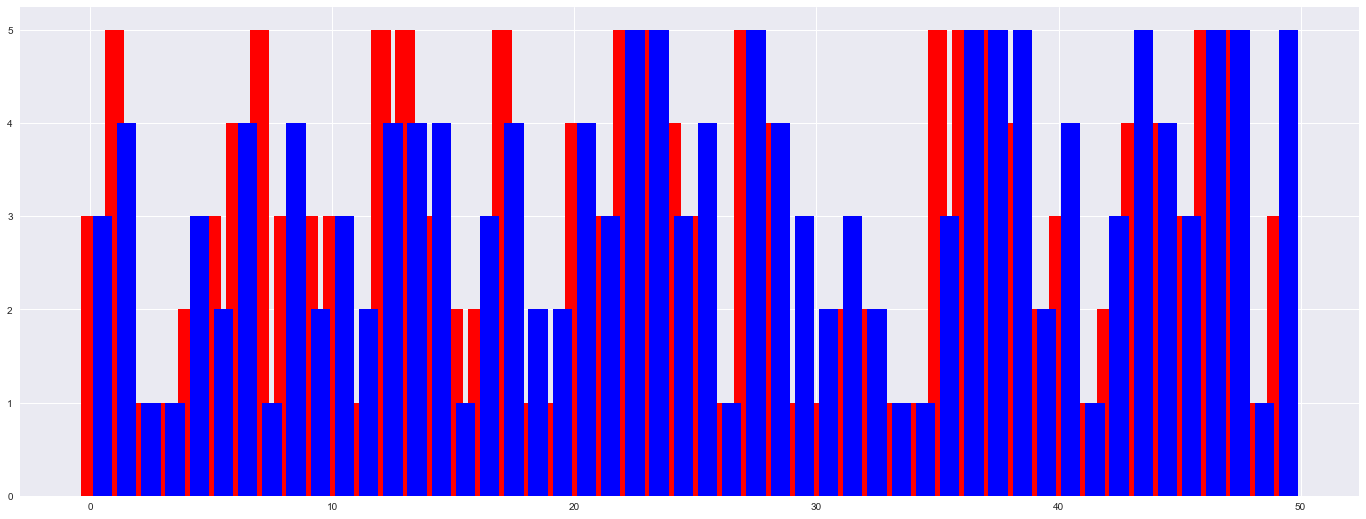

In [23]:
plt.figure(figsize= (24,9))
N =50
w = 0.5
ind = np.arange(N) 
plt.bar(ind,preds[0:N], color='r')
plt.bar(ind+w,y_test[0:N], color='b')

In [24]:
vectors.shape

(57635, 1511286)

In [25]:
type(vectors)

scipy.sparse.csr.csr_matrix

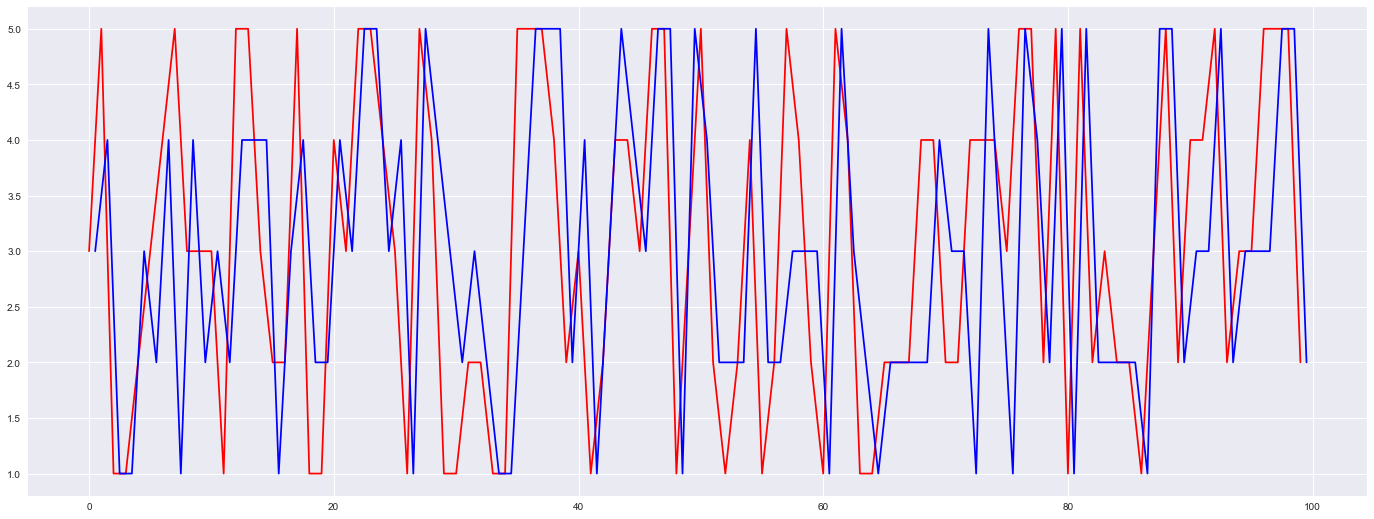

In [26]:
plt.figure(figsize= (24,9))
N =100
w = 0.5
ind = np.arange(N) 
plt.plot(ind,preds[0:N], color='r')
plt.plot(ind+w,y_test[0:N], color='b')